# <div style="color:#fff;display:fill;border-radius:10px;background-color:#004F98;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Gold Price Prediction</div>

## <span style='color:#2E8BC0'> 0| Import Libraries</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## <span style='color:#2E8BC0'> 1| Data Collection</span>

In [3]:
dataset = pd.read_csv("gld_price_data.csv")
df = dataset.copy()
df.head()

## ==> First Top 5 Rows

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.tail()

## ==> Last 5 Rows

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
df.shape

## ==> Shape of Data(Rows, Columns)

(2290, 6)

In [8]:
df.info()

## ==> Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df.describe()

## ==> Descriptive Statics About Data

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
df.dtypes

## ==> data type about data

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [13]:
df.describe(include=['O'])

,Date
count,2290
unique,2290
top,1/2/2008
freq,1


In [14]:
df.isnull().sum()

## ==> Check The missing Values

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## <span style='color:#2E8BC0'> 2| Data Wrangling</span>

In [16]:
corr = df.corr()
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

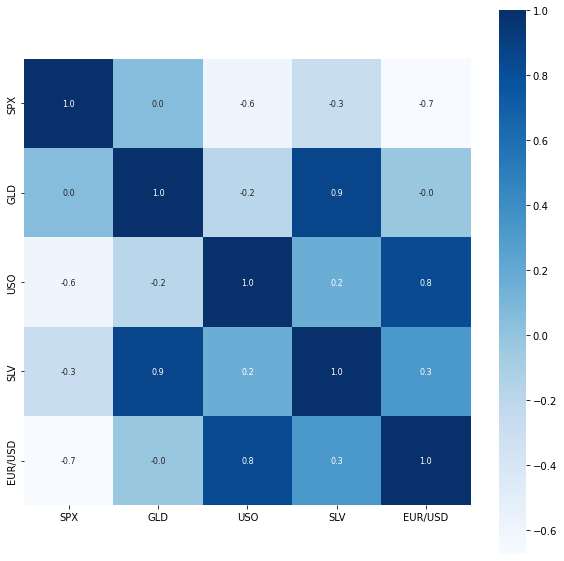

In [19]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (10,10))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

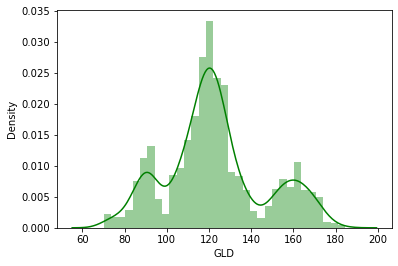

In [22]:
# checking the distribution of the GLD Price
sns.distplot(df['GLD'],color='green')

## <span style='color:#2E8BC0'> 3| Splitting The Features and Traget</span>

In [24]:
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [25]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [26]:
Y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

## <span style='color:#2E8BC0'> 4| Splitting into Training data and Test Data </span>

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## <span style='color:#2E8BC0'> 5| Building Model </span>

In [29]:
regressor = RandomForestRegressor(n_estimators=100)

## <span style='color:#2E8BC0'> 6| Training Model </span>

In [30]:
  regressor.fit(X_train,Y_train)

RandomForestRegressor()

# <span style='color:#2E8BC0'> 7| Model Evaluation </span>

In [31]:
test_data_prediction = regressor.predict(X_test)

In [32]:
print(test_data_prediction)

[168.5947988   82.25759983 115.9037002  127.60120104 120.55030128
 154.83629713 150.2923982  126.1376004  117.43169881 125.97100114
 116.54910109 171.00860092 141.89229847 168.07329876 115.09320008
 117.61070069 138.46090364 170.20350086 159.80550344 158.26199908
 154.80429998 125.47070006 175.67849908 157.76860292 125.18200043
  93.68179964  77.45130014 120.47499982 119.1592997  167.49459914
  88.36520051 125.1710002   91.25420104 117.78080009 121.04929898
 136.63450135 115.41750168 115.43110119 149.29619932 107.05810113
 104.38060246  87.27099783 126.46760053 117.85979992 153.64409945
 119.56650009 108.39850006 108.35169841  93.26150043 126.89799832
  75.34560028 113.60939909 121.14390007 111.2880996  118.778099
 120.60749966 159.59890051 169.2118013  146.92499709  85.80029865
  94.34330031  86.78669893  90.32140007 119.01780061 126.46920018
 127.39070007 169.07669971 122.15809936 117.25869901  98.51000029
 168.37760151 143.25909856 132.0173029  121.13090214 121.17329946
 119.7070008

## R Square Error !

In [33]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.9890205224438344


## Compare the Actual Values and Predicted Values in a Plot

In [34]:
Y_test = list(Y_test)

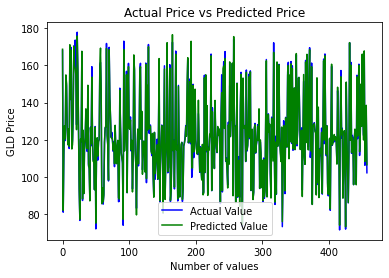

In [35]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()